<a href="https://colab.research.google.com/github/Gnanapreetham2808/Google_Stock_Prediction/blob/main/DL_PROJECT_MODEL_02(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\vamshi krishna\Downloads\Google_Stock_Price_Train.csv")

In [ ]:
#Printing the first few entries of data
print("\nThe first few rows of the dataset are:")
data.head()


The first few rows of the dataset are:


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#Printing the last few entries of data
print("The last few entries of the dataset are:")
data.tail()

The last few entries of the dataset are:


,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
#Printing the summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000


In [ ]:
#Print the information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None


In [ ]:
print(data.shape)

(1258, 6)


In [ ]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
print(data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
print(data.isna().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
#Outlier removal
import pandas as pd
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    # Define bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

    return data_cleaned

print("Original Dataset:")
print(data)

# Remove outliers
data = remove_outliers_iqr(data)

print("\nDataset after removing outliers:")
print(data)

Original Dataset:
            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]

Dataset after removing outliers:
            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       

C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_18800\4250497024.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_18800\4250497024.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_18800\4250497024.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = data[~((data < lower_bound) | (data > upp

In [ ]:
# Convert 'Date' column to datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Focus on 'Close' prices for forecasting
closing_prices = data[['Close']]

# Clean the 'Close' column by removing commas and converting to float
closing_prices['Close'] = pd.to_numeric(closing_prices['Close'].str.replace(',', ''), errors='coerce')

C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_18800\3887362742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices['Close'] = pd.to_numeric(closing_prices['Close'].str.replace(',', ''), errors='coerce')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

In [ ]:
# Define a function to create sequences for time-series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)
sequence_length = 60
# Prepare the sequences
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# Reshape X to be compatible with LSTM/GRU input: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)
print("\n The dimension of the training dataset are: ")
print(X.shape)
print("\n The dimensions of the test dataset are: ")
print(y.shape)


 The dimension of the training dataset are: 
(1198, 60, 1)

 The dimensions of the test dataset are: 
(1198,)


In [ ]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

C:\Users\vamshi krishna\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# LSTM Predictions and Evaluation
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

lstm_mae = mean_absolute_error(y_test_rescaled, lstm_predictions_rescaled)
lstm_mse = mean_squared_error(y_test_rescaled, lstm_predictions_rescaled)
lstm_r2 = r2_score(y_test_rescaled, lstm_predictions_rescaled)

print("LSTM Results:")
print("MAE:", lstm_mae)
print("MSE:", lstm_mse)
print("R2 Score:", lstm_r2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
LSTM Results:
MAE: 14.382146062215172
MSE: 388.4365295500505
R2 Score: 0.985248999848348


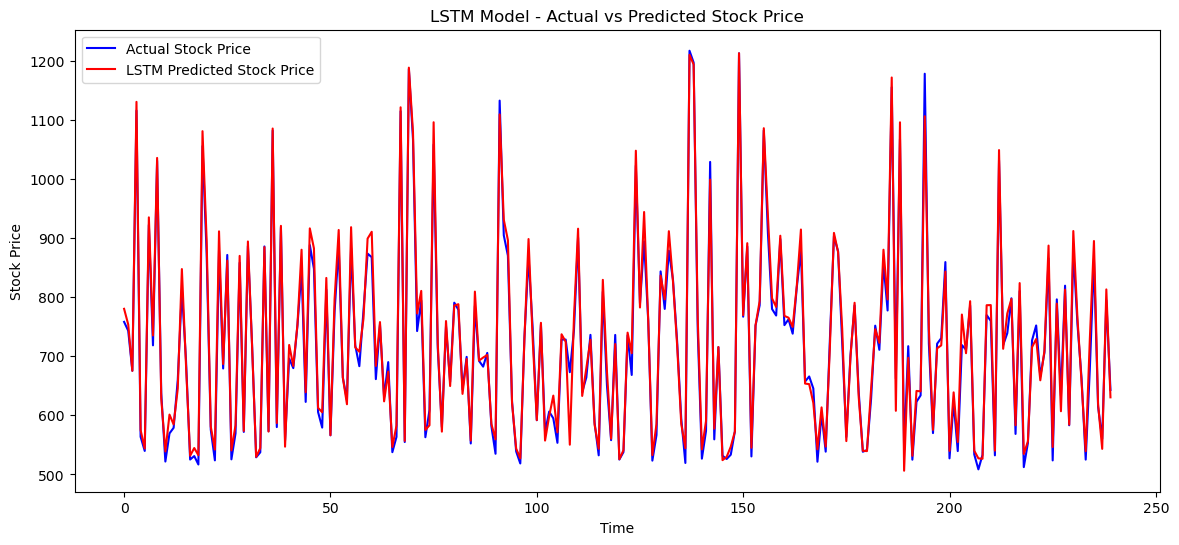

In [ ]:
# Plotting Actual vs Predicted for LSTM
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions_rescaled, color='red', label='LSTM Predicted Stock Price')
plt.title('LSTM Model - Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
dataset_test = pd.read_csv(r"C:\Users\vamshi krishna\Downloads\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
print(dataset_test)

         Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
16  1/26/2017  837.81  838.00  

In [ ]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


C:\Users\vamshi krishna\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


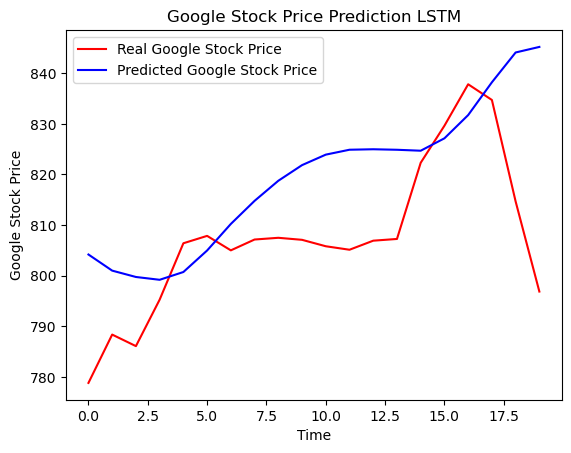

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()